In [2]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

c:\Users\88697\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
findata = pd.read_csv('C:\\Users\\88697\\Desktop\\碩二\\碩二論文雜項\\Sentences_75Agree.txt', encoding= 'unicode_escape')
findata

,sentence,label
0,"According to Gran , the company has no plans t...",0
1,With the new production plant the company woul...,1
2,"For the last quarter of 2010 , Componenta 's n...",1
3,"In the third quarter of 2010 , net sales incre...",1
4,Operating profit rose to EUR 13.1 mn from EUR ...,1
...,...,...
3375,Operating result for the 12-month period decre...,2
3376,HELSINKI Thomson Financial - Shares in Cargote...,2
3377,LONDON MarketWatch -- Share prices ended lower...,2
3378,Operating profit fell to EUR 35.4 mn from EUR ...,2


In [10]:
findata['label'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
findata.groupby('label').nunique()

,sentence
label,
0,2094
1,871
2,410


In [12]:
findata['label'].isnull().sum()

0

In [13]:
#Remove URLs from sentences
#Tokenize text
#Remove emails
#Remove new lines characters
#Remove distracting single quotes
def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)

    return data

In [14]:
temp = []
#Splitting pd.Series to list
data_to_list = findata['sentence'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing.',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability.',
 'For the last quarter of 2010 , Componenta s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m.',
 'In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn.',
 'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales.']

In [15]:
#Remove all punctuation signs
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data_words = list(sent_to_words(temp))

print(data_words[:10])

[['according', 'to', 'gran', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing'], ['with', 'the', 'new', 'production', 'plant', 'the', 'company', 'would', 'increase', 'its', 'capacity', 'to', 'meet', 'the', 'expected', 'increase', 'in', 'demand', 'and', 'would', 'improve', 'the', 'use', 'of', 'raw', 'materials', 'and', 'therefore', 'increase', 'the', 'production', 'profitability'], ['for', 'the', 'last', 'quarter', 'of', 'componenta', 'net', 'sales', 'doubled', 'to', 'eur', 'from', 'eur', 'for', 'the', 'same', 'period', 'year', 'earlier', 'while', 'it', 'moved', 'to', 'zero', 'pre', 'tax', 'profit', 'from', 'pre', 'tax', 'loss', 'of', 'eur'], ['in', 'the', 'third', 'quarter', 'of', 'net', 'sales', 'increased', 'by', 'to', 'eur', 'mn', 'and', 'operating', 'profit', 'by', 'to', 'eur', 'mn'], ['operating', 'profit', 'rose', 'to', 'eur', 'mn', 'from', 'eur', 'mn', 'in', 'the', 'corr

In [16]:
len(data_words)

3380

In [17]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [18]:
#Detokenize text
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['according to gran the company has no plans to move all production to russia although that is where the company is growing', 'with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability', 'for the last quarter of componenta net sales doubled to eur from eur for the same period year earlier while it moved to zero pre tax profit from pre tax loss of eur', 'in the third quarter of net sales increased by to eur mn and operating profit by to eur mn', 'operating profit rose to eur mn from eur mn in the corresponding period in representing of net sales']


In [19]:
#Convert list of texts to Numpy array
data = np.array(data)

In [20]:
labels = np.array(findata['label'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] == 1:
        y.append(1)
    if labels[i] == 2:
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [21]:
len(labels)

3380

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
finsen = pad_sequences(sequences, maxlen=max_len)
print(finsen)

[[   0    0    0 ...   10    8  889]
 [   0    0    0 ...    1   96  890]
 [   0    0    0 ...   51    2    6]
 ...
 [   0    0    0 ...    7    1 1935]
 [   0    0    0 ...    2    6   11]
 [   0    0    0 ...   36  807   14]]


In [23]:
print(labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [24]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(finsen, labels, random_state=42)
print (len(X_train),len(X_test),len(y_train),len(y_test))

2535 845 2535 845


In [29]:
model = Sequential()
model.add(layers.Embedding(max_words, 50, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(128,dropout=0.2)))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_weights_only=False)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10


80/80 [==============================] - ETA: 0s - loss: 0.7800 - accuracy: 0.6797
Epoch 1: val_accuracy improved from -inf to 0.73136, saving model to best_model.hdf5
80/80 [==============================] - 8s 83ms/step - loss: 0.7800 - accuracy: 0.6797 - val_loss: 0.6681 - val_accuracy: 0.7314
Epoch 2/10
79/80 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.7864
Epoch 2: val_accuracy improved from 0.73136 to 0.75858, saving model to best_model.hdf5
80/80 [==============================] - 6s 80ms/step - loss: 0.4938 - accuracy: 0.7866 - val_loss: 0.5915 - val_accuracy: 0.7586
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.8387
Epoch 3: val_accuracy improved from 0.75858 to 0.76095, saving model to best_model.hdf5
80/80 [==============================] - 7s 81ms/step - loss: 0.3641 - accuracy: 0.8387 - val_loss: 0.6187 - val_accuracy: 0.7609
Epoch 4/10
79/80 [============================>.] - ETA: 0s - lo

In [30]:
#load the best model obtained during training
best_model = keras.models.load_model("best_model.hdf5")

In [31]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

27/27 - 1s - loss: 0.7349 - accuracy: 0.8272 - 897ms/epoch - 33ms/step
Model accuracy:  0.8272189497947693


In [32]:
predictions = best_model.predict(X_test)

27/27 [==============================] - 1s 19ms/step


In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

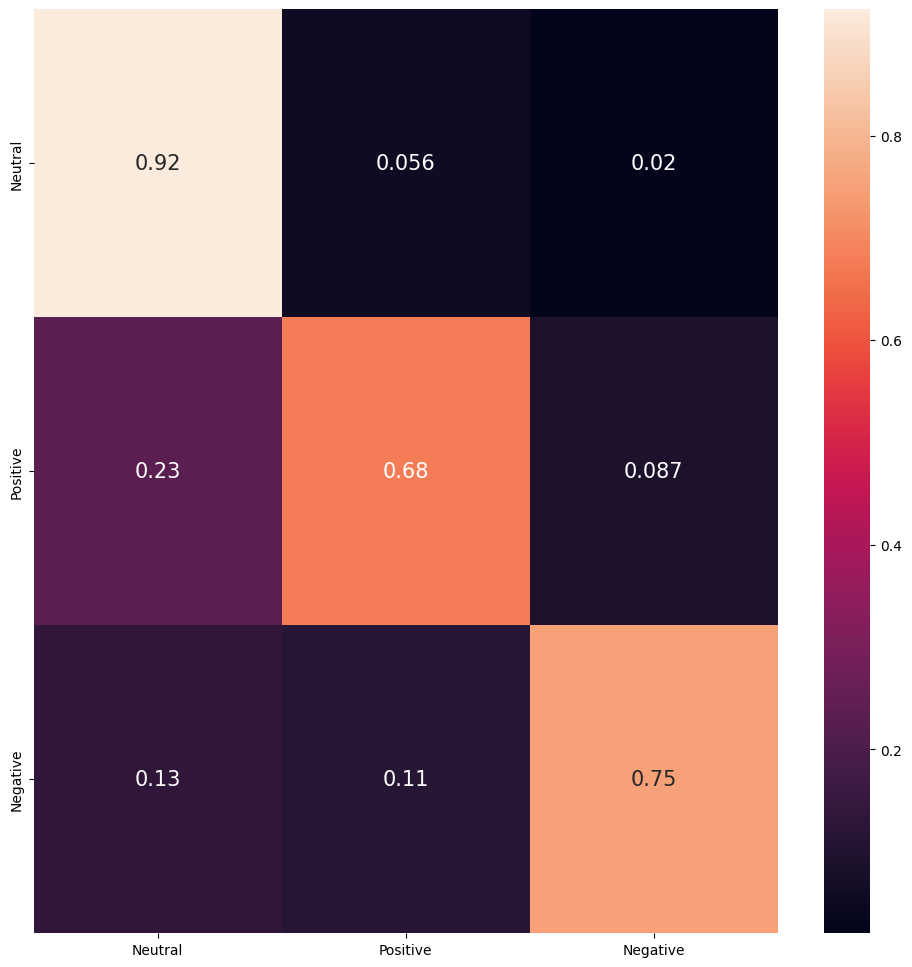

In [34]:
import seaborn as sns
# 使用 Pandas DataFrame 來創建混淆矩陣
conf_matrix = pd.DataFrame(matrix, index=['Neutral', 'Positive', 'Negative'], columns=['Neutral', 'Positive', 'Negative'])

# 將 DataFrame 的數據提取為 numpy 數組，進行归一化
norm_matrix = conf_matrix.to_numpy().astype('float') / conf_matrix.sum(axis=1).to_numpy()[:, np.newaxis]

# 將归一化後的數據再次轉換回 DataFrame
conf_matrix = pd.DataFrame(norm_matrix, index=conf_matrix.index, columns=conf_matrix.columns)
plt.figure(figsize = (12,12))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
plt.show()

In [35]:
sentiment = ['Neutral','Positive','Negative']

In [36]:
import pandas as pd
import numpy as np

In [37]:
best_model.save("/content/drive/MyDrive/Colab Notebooks/BiLSTM")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/BiLSTM\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/BiLSTM\assets


In [38]:
data = pd.read_csv('C:\\Users\\88697\\Downloads\\AINews_label\\Total_data.csv', usecols=[1]).values
data2 = pd.read_csv('C:\\Users\\88697\\Downloads\\AINews_label\\Total_data.csv')
lst=[]
for x in range(len(data)):
  sequence = tokenizer.texts_to_sequences(data[x])
  string = np.array_str(data[x])
  print(string)
  test = pad_sequences(sequence, maxlen=max_len)
  result = sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]
  lst.append(result)
  print(x+1,result)
lst
for x in range(len(lst)):
    data2.at[x, 'BiLSTM Label'] = lst[x]
df = pd.DataFrame(data2)
df.to_csv('C:\\Users\\88697\\Downloads\\AINews_label\\Total_data.csv',index=False)
df

['Dialpad Acquires TalkIQ to Bring Voice-Driven Artificial Intelligence to Business Communications']
1/1 [==============================] - 0s 28ms/step
1 Positive
['Dialpad, the pure-cloud business communications provider, today announced it has acquired TalkIQ, a leader in real-time speech recognition and artificial intelligence.']
1/1 [==============================] - 0s 16ms/step
2 Neutral
["By combining TalkIQ's real-time speech recognition and natural language processing technologies with Dialpad's leading communications solutions, Dialpad will deliver VoiceAI to help business teams capture and learn from conversations as they happen."]
1/1 [==============================] - 0s 17ms/step
3 Neutral
['One trillion words are spoken every day on phone calls between U.S. businesses and their customers, and 92 percent of business and customer interactions still happen over the phone.']
1/1 [==============================] - 0s 18ms/step
4 Neutral
['By applying voice intelligence to al

,number,sentence,researcher label,ChatGPT label,researcher2 label,final label,BiLSTM Label,BERT Label,FinBERT Label,FinBERT_FinNews Label,LM Label,FinBERT_AICalls Label
0,1,Dialpad Acquires TalkIQ to Bring Voice-Driven ...,Neutral,Positive,Neutral,NaN,Positive,Neutral,Neutral,NaN,NaN,Neutral
1,2,"Dialpad, the pure-cloud business communication...",Neutral,Neutral,Neutral,NaN,Neutral,Neutral,Neutral,NaN,NaN,Neutral
2,3,By combining TalkIQ's real-time speech recogni...,Neutral,Positive,Neutral,NaN,Neutral,Positive,Neutral,NaN,NaN,Neutral
3,4,One trillion words are spoken every day on pho...,Neutral,Neutral,Neutral,NaN,Neutral,Neutral,Neutral,NaN,NaN,Neutral
4,5,By applying voice intelligence to all external...,Neutral,Positive,Positive,NaN,Neutral,Positive,Positive,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
666,13,Support for four other undisclosed brands are...,Neutral,Neutral,Neutral,NaN,Neutral,Neutral,Neutral,NaN,NaN,Neutral
667,14,Customer safety and the ability to do more whi...,Neutral,Neutral,Neutral,NaN,Neutral,Neutral,Neutral,NaN,NaN,Positive
668,15,"On one hand, they want the customer to be abl...",Neutral,Neutral,Neutral,NaN,Neutral,Neutral,Neutral,NaN,NaN,Neutral
669,16,"Alfia continues, ""By having access to our serv...",Positive,Positive,Positive,NaN,Neutral,Neutral,Neutral,NaN,NaN,Neutral


In [39]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# 讀取 CSV 檔案
file_path = 'C:\\Users\\88697\\Downloads\\AINews_label\\Total_data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# 計算不匹配的次數
mismatches = data['researcher2 label'] != data['BiLSTM Label']
mismatch_count = mismatches.sum()
total_data = data['researcher2 label'] == data['researcher2 label']
data_count = total_data.sum()

# 計算準確率
accuracy = accuracy_score(data['researcher2 label'], data['BiLSTM Label'])
# 計算精確率
precision = precision_score(data['researcher2 label'], data['BiLSTM Label'], average='macro')
# 計算召回率
recall = recall_score(data['researcher2 label'], data['BiLSTM Label'], average='macro')
# 計算 F1 分數
f1 = f1_score(data['researcher2 label'], data['BiLSTM Label'], average='macro')

print(f"Number of data: {data_count}")
print(f"Number of mismatches: {mismatch_count}")
print(f"Accuracy of the model predictions: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Number of data: 671
Number of mismatches: 272
Accuracy of the model predictions: 0.59
Precision: 0.42
Recall: 0.38
F1 Score: 0.36
